# Create all charts
---

## The data sets we used are:
* City of Austin, austin_311_service_requests.csv
* The Travis county zip codes from the US Census Bureau.
* Social/Economic census data for Austin, TX by zipcode from the US Census Bureau
* City of Austin Household statistics from the US Census Bureau.

In [ ]:
import os
import datetime
import numpy as np
import regex as reg
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

In [6]:
path_311 = os.path.join('..', 'data', '311_cleaned_data_.csv')
df = pd.read_csv(path_311)
df.count()

service_request_id      275281
status_description      275281
mobile_web_status       275281
duplicate_verified      275281
override_duplicate      275281
functional_location     249932
source                  275280
closed_date             125670
updated_datetime        158982
open                    275281
closed                  275281
description             273914
agency_responsible      274720
service_name            274244
service_subtype          72326
lat                     275281
long                    275281
sap_problem_category    156983
sap_problem_type        156964
address                 274431
case_record_type        275281
district                274405
date                    275281
time                    275281
weekday                 275281
year                    275281
month                   275281
day                     275281
dtype: int64

### Number of 311 calls by month

* be sure to limit this to a two year period

In [7]:
print('min:', df['date'].min())
print('max:', df['date'].max())

min: 2016-05-20
max: 2018-07-29


In [22]:
period_311 = df[df['date'] < '2018-07-20']
months = period_311.groupby('month', as_index=False)['service_request_id'].count()
months['month'] = months['month'].map(lambda x: datetime.date(1900, int(x), 1).strftime('%B'))

JanuaryFebruaryMarchAprilMayJuneJulyAugustSeptemberOctoberNovemberDecember


KeyError: "['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'\n 'September' 'October' 'November' 'December'] not in index"

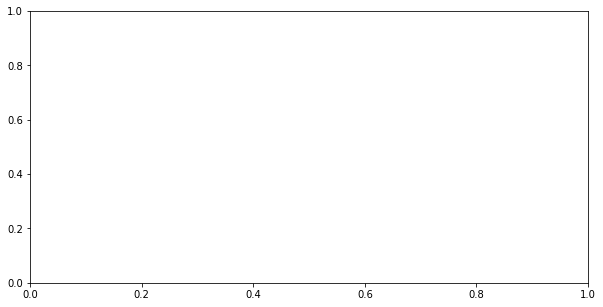

In [18]:
fig, ax = plt.subplots(figsize=[10, 5])
months.plot.bar(x=months['month'], ax=ax, legend=False)
plt.xlabel('Months')
plt.ylabel('Number of Service Calls')
plt.xticks(rotation=45, ha='right')

### Number of 311 calls by type

* Garrett is working on this

In [ ]:
service_df = df.groupby('service_name')
service = service_df['service_request_id'].sum().sort_values()
fig, ax = plt.subplots(figsize=[16, 8])
service.plot.bar()
plt.xticks(rotation=70, ha='right')

### breakdown of percentage of call categories

In [ ]:
x, = reg.findall('CA.*(\d{5})', '20121 Frankfort St, San Diego, CA 92110, USA')
x

In [ ]:
pd.DataFrame(np.arange(4, 4), columns=['a', 'b', 'c', 'd'])

In [ ]:
regzip = df[type(df['address'] == str, 'address')].map(lambda x: type(x))
regzip.unique()

In [ ]:
df['case_record_type'].unique()

### locations of callers (bubble plot?)

### Number of calls per capita by zipcode

In [ ]:
pop_path = os.path.join('..', 'data', 'census_population_by_zip.csv')
pop_df = pd.read_csv(pop_path)
pop_df.head()

### Number of calls by median household income of zip

In [ ]:
income_path = os.path.join('..', 'data', 'census_income_by_zip.csv')
income_df = pd.read_csv(income_path)
income_df

### Number of calls by crime rate of zip

### Percent of call types by median household income (stacked bar)

### Number of calls by Temperature scatter

In [ ]:
owm_path = os.path.join('..', 'data', 'owm_2016_2018.csv')
temp_df = pd.read_csv(owm_path)
temp_df.head()

In [ ]:
[x for x in temp_df['dt_iso'].head()]

### Number fo calls by weekday

In [ ]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', ]
weekdays = df.groupby('weekday', as_index=False)['service_request_id'].count()
weekdays['day_order'] = weekdays['weekday'].map(lambda x: days.index(x))
weekdays.sort_values('day_order', inplace=True)
weekdays

In [ ]:
plt.figure(figsize=[16, 8])
plt.bar(weekdays['weekday'], weekdays['service_request_id'])